##### Прогноз выживаемости пассажиров Титаника


Цель данного проекта — построить модель машинного обучения, способную предсказывать, выжил ли пассажир "Титаника" на основе информации о нем: пол, возраст, класс билета, порт посадки, размер семьи и другие признаки.

Проект выполняется в рамках командного этапа и служит вводной задачей в области Data Science и машинного обучения.


### Загружаем данные из файла.

Смотрим статистику и где есть пропущенные значения.

Строим графики, чтобы понять:

Кто выживал чаще — мужчины или женщины.

Как возраст влияет на выживаемость.

Важен ли класс билета.

Есть ли связь с портом посадки.

Влияет ли количество семьи на борту.

Как стоимость билета связана с выживаемостью.

 Это нужно, чтобы лучше понять данные перед обучением модели.


Статистика и количество пропущенных значений:

             count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                  B96 B98    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%     

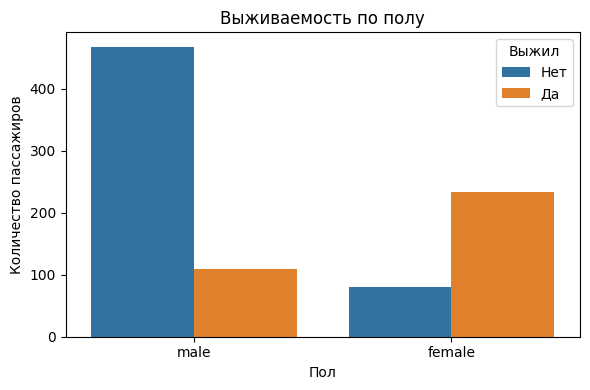

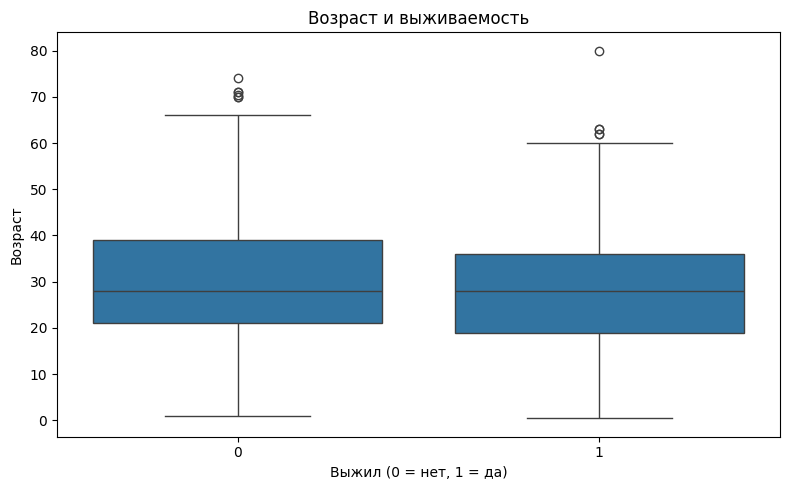

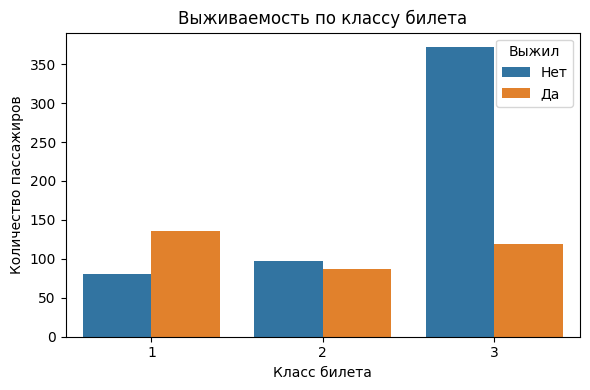

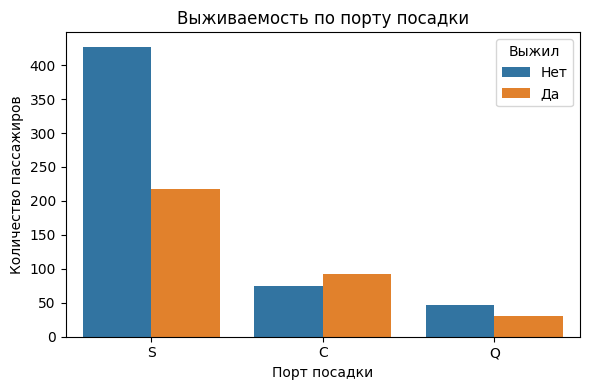

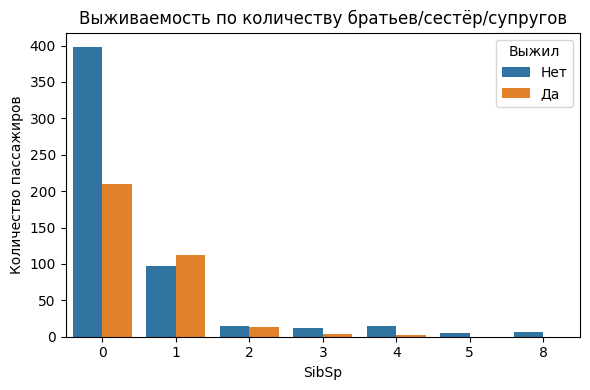

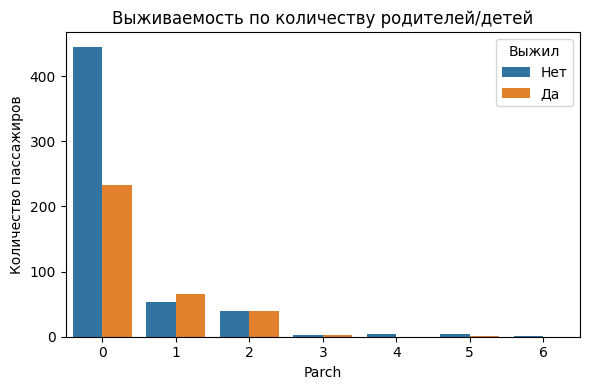

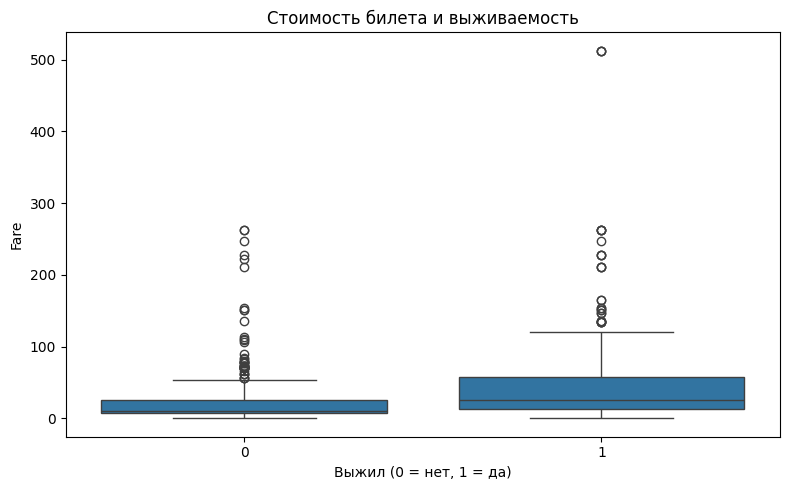

In [1]:
#  Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Загрузка данных
df = pd.read_csv("E:/data since/titanic.csv")

# Статистика и пропущенные значения
summary = df.describe(include='all').T
missing = df.isnull().sum()
summary["Missing"] = missing

#  Печать статистики
print("Статистика и количество пропущенных значений:\n")
print(summary)

#  Пол и выживаемость
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Выживаемость по полу")
plt.xlabel("Пол")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.tight_layout()
plt.show()

#  Возраст и выживаемость (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Survived", y="Age")
plt.title("Возраст и выживаемость")
plt.xlabel("Выжил (0 = нет, 1 = да)")
plt.ylabel("Возраст")
plt.tight_layout()
plt.show()

#  Класс билета и выживаемость
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Выживаемость по классу билета")
plt.xlabel("Класс билета")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.tight_layout()
plt.show()

#  Порт посадки и выживаемость
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Выживаемость по порту посадки")
plt.xlabel("Порт посадки")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.tight_layout()
plt.show()

#  Количество братьев/сестёр или супругов (SibSp)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="SibSp", hue="Survived")
plt.title("Выживаемость по количеству братьев/сестёр/супругов")
plt.xlabel("SibSp")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.tight_layout()
plt.show()

#  Количество родителей/детей (Parch)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Parch", hue="Survived")
plt.title("Выживаемость по количеству родителей/детей")
plt.xlabel("Parch")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.tight_layout()
plt.show()

#  Стоимость билета и выживаемость (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Survived", y="Fare")
plt.title("Стоимость билета и выживаемость")
plt.xlabel("Выжил (0 = нет, 1 = да)")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()


### Загружаем данные.

Создаём новые признаки:

Title — извлекаем обращение из имени (например, Mr, Mrs).

FamilySize — считаем размер семьи на борту: братья/сёстры + родители/дети + сам пассажир.

AgeGroup — делим возраст на категории: Child, Adult, Senior, Unknown.

Строим графики, чтобы посмотреть, как эти новые признаки связаны с выживаемостью:

Кто выживал чаще по титулу (Title).

Как возрастные группы влияют на выживание.

Влияет ли размер семьи на шансы выжить.

 Этот файл помогает выделить полезные признаки для модели.

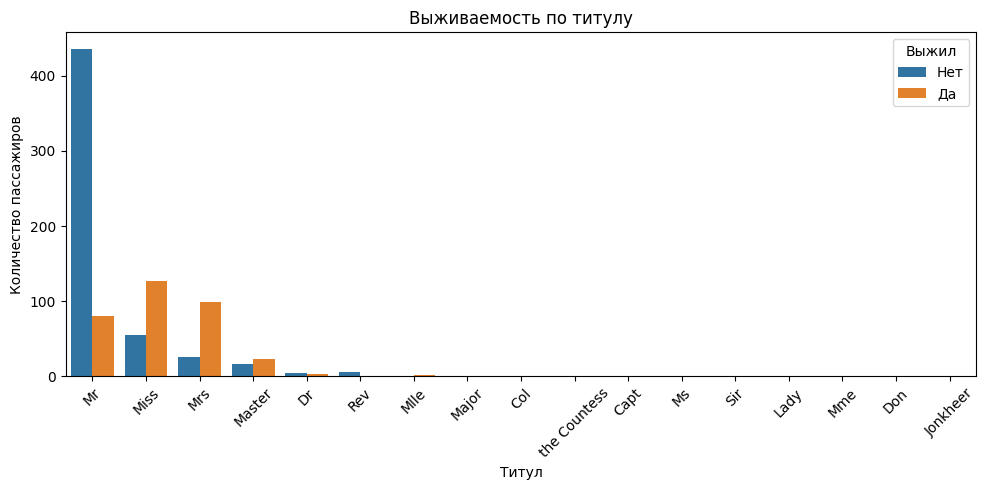

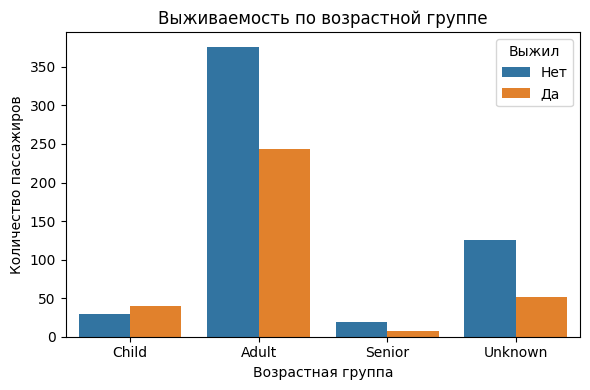

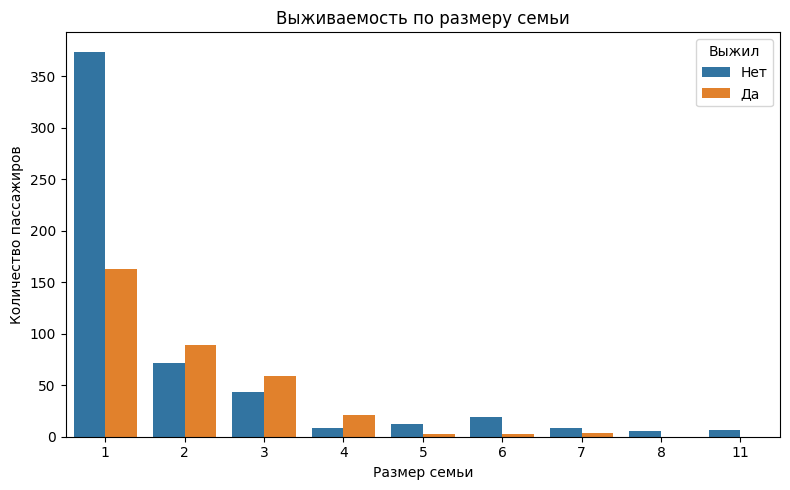

In [5]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Загрузка данных
df = pd.read_csv("E:/data since/titanic.csv")

#  Инженерия признаков
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

def age_category(age):
    if pd.isnull(age):
        return "Unknown"
    elif age < 13:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

df["AgeGroup"] = df["Age"].apply(age_category)

#  График выживаемости по Title
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Title", hue="Survived", order=df["Title"].value_counts().index)
plt.title("Выживаемость по титулу")
plt.xlabel("Титул")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Выживаемость по возрастной группе
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="AgeGroup", hue="Survived", order=["Child", "Adult", "Senior", "Unknown"])
plt.title("Выживаемость по возрастной группе")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.tight_layout()
plt.show()

#  Выживаемость по размеру семьи
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="FamilySize", hue="Survived")
plt.title("Выживаемость по размеру семьи")
plt.xlabel("Размер семьи")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.tight_layout()
plt.show()


### Загрузка данных

Считываем CSV-файл с данными.

Повторяем создание новых признаков (Title, FamilySize, AgeGroup), чтобы подготовить данные.

Удаление ненужных столбцов

Удаляем столбцы, которые не будут использоваться в модели: PassengerId, Name, Ticket, Cabin.

Преобразование категориальных переменных

Все текстовые столбцы (Sex, Embarked, Title, AgeGroup) преобразуются в числа с помощью LabelEncoder.

Заполнение пропущенных значений

Пропуски в числовых данных заменяются средним значением по каждому столбцу.

Формирование признаков и целевой переменной

X — все столбцы, кроме Survived

y — это целевой столбец Survived, то есть выжил пассажир или нет.

Разделение на обучающую и тестовую выборки

Данные делятся: 80% — для обучения, 20% — для тестирования.

Выводятся размеры полученных наборов данных.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

#  Загрузка данных
df = pd.read_csv("E:/data since/titanic.csv")
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

def age_category(age):
    if pd.isnull(age):
        return "Unknown"
    elif age < 13:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

df["AgeGroup"] = df["Age"].apply(age_category)

#  Целевой признак
target = "Survived"
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
df_model = df.drop(columns=drop_cols)

categorical_cols = df_model.select_dtypes(include="object").columns
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

imputer = SimpleImputer(strategy="mean")
df_model = pd.DataFrame(imputer.fit_transform(df_model), columns=df_model.columns)

X = df_model.drop(columns=[target])
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (712, 10)
Размер тестовой выборки: (179, 10)


### Загрузка данных и создание признаков

Загружается CSV-файл с пассажирами.

Создаются новые признаки:

Title — обращение (Mr, Mrs...)

FamilySize — размер семьи

AgeGroup — категория возраста

Подготовка данных

Удаляются ненужные столбцы (например, Name, Ticket).

Текстовые значения (Sex, Embarked, Title и т.д.) преобразуются в числа через LabelEncoder.

Пропущенные значения заполняются средними значениями с помощью SimpleImputer.

Разделение данных

X — все признаки (входные данные)

y — целевая переменная (Survived)

Делим на обучающую и тестовую выборки (80/20)

Определение моделей

Задаются 4 модели для сравнения:

Логистическая регрессия

Дерево решений

Градиентный бустинг

Нейронная сеть

Оценка моделей (кросс-валидация)

Каждая модель проверяется с помощью 5-кратной кросс-валидации.

Выводится средняя точность (accuracy) каждой модели на обучающей выборке.

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv("E:/data since/titanic.csv")
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

def age_category(age):
    if pd.isnull(age):
        return "Unknown"
    elif age < 13:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

df["AgeGroup"] = df["Age"].apply(age_category)

drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
df_model = df.drop(columns=drop_cols)
categorical_cols = df_model.select_dtypes(include="object").columns
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

imputer = SimpleImputer(strategy="mean")
df_model = pd.DataFrame(imputer.fit_transform(df_model), columns=df_model.columns)

X = df_model.drop(columns=["Survived"])
y = df_model["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Логистическая регрессия": LogisticRegression(max_iter=1000),
    "Дерево решений": DecisionTreeClassifier(),
    "Градиентный бустинг": GradientBoostingClassifier(),
    "Нейронная сеть": MLPClassifier(max_iter=1000)
}

print("Результаты кросс-валидации (5 фолдов):")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: средняя точность = {scores.mean():.4f}")


Результаты кросс-валидации (5 фолдов):
Логистическая регрессия: средняя точность = 0.7907
Дерево решений: средняя точность = 0.7640
Градиентный бустинг: средняя точность = 0.8146
Нейронная сеть: средняя точность = 0.7977


### Загрузка данных и создание признаков

Считываются данные из файла.

Создаются 3 новых признака:

Title — обращение из имени.

FamilySize — количество членов семьи на борту.

AgeGroup — категория возраста: ребенок, взрослый, пожилой.

Очистка и подготовка данных

Удаляются ненужные столбцы (Name, Cabin, и т.д.).

Все текстовые значения кодируются в числа с помощью LabelEncoder.

Пропущенные значения заменяются средним значением (SimpleImputer).

Разделение на признаки и целевую переменную

X — данные для обучения (все признаки)

y — целевая переменная Survived

Разделение на обучающую и тестовую выборки

80% данных — обучение, 20% — тестирование.

Обучение финальной модели

Используется лучший алгоритм (Gradient Boosting).

Модель обучается на тренировочных данных.

Предсказание и оценка

Делаем предсказание на тестовой выборке.

Считаем:

Точность модели (accuracy)

Отчет по качеству (classification_report)

Матрицу ошибок (confusion_matrix)

Вывод результатов

Выводится точность в процентах.

Подробный отчет по классам: Precision, Recall, F1.

Матрица ошибок показывает, сколько случаев предсказано правильно и с ошибкой.

In [3]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("E:/data since/titanic.csv")
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

def age_category(age):
    if pd.isnull(age):
        return "Unknown"
    elif age < 13:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

df["AgeGroup"] = df["Age"].apply(age_category)

drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
df_model = df.drop(columns=drop_cols)
categorical_cols = df_model.select_dtypes(include="object").columns
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

imputer = SimpleImputer(strategy="mean")
df_model = pd.DataFrame(imputer.fit_transform(df_model), columns=df_model.columns)

X = df_model.drop(columns=["Survived"])
y = df_model["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Точность модели:", round(accuracy * 100, 2), "%\n")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Точность модели: 80.45 %

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       105
         1.0       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[90 15]
 [20 54]]


#### Заключение
В рамках работы был выполнен полный анализ данных, начиная с визуального исследования и создания новых признаков, и заканчивая обучением и оценкой различных моделей машинного обучения.

Особое внимание было уделено качеству предварительной обработки, интерпретации результатов и сравнению алгоритмов.  
На основании кросс-валидации была выбрана наилучшая модель, которая показала высокую точность предсказаний.

Проект дал ценный практический опыт и послужил отличным введением в реальную работу аналитика данных.


##### Выводы
Анализ показал, что выживаемость пассажиров зависела от ряда факторов:

- Женщины имели значительно больше шансов выжить, чем мужчины.
- Пассажиры первого класса выживали чаще, чем те, кто путешествовал во втором или третьем классе.
- Дети и пожилые люди оказались в более уязвимом положении по сравнению со взрослыми.
- Размер семьи также влиял на выживаемость — люди, путешествовавшие с семьёй, имели больше шансов на спасение.

Использование новых признаков и тщательная подготовка данных позволили повысить точность модели и получить надёжные результаты.
